/tmp/ipython-input-2649429663.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start, end=end)   #download from yahoo
[*********************100%***********************]  1 of 1 completed


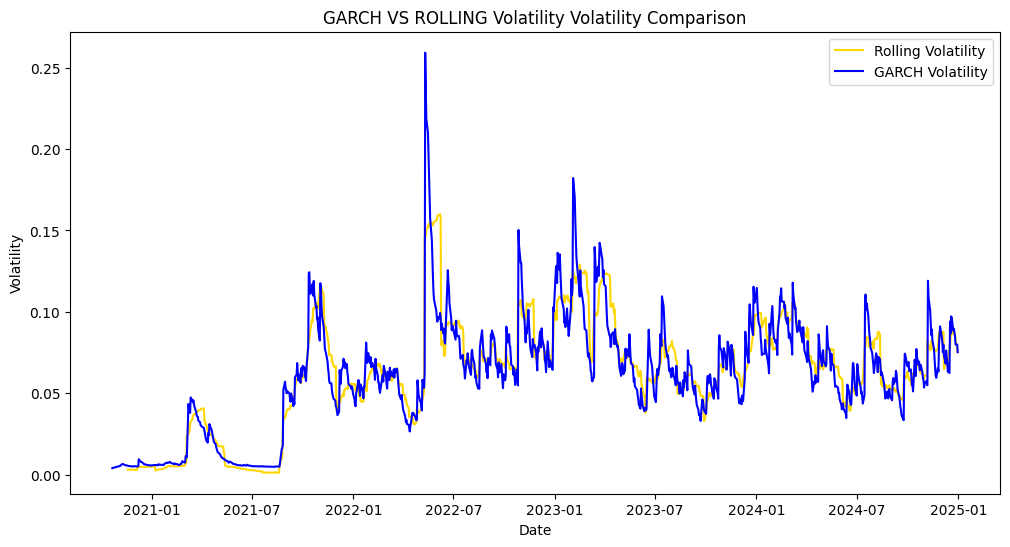

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             LogReturns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3286.67
Distribution:                  Normal   AIC:                           6581.34
Method:            Maximum Likelihood   BIC:                           6601.19
                                        No. Observations:                 1055
Date:                Mon, Nov 03 2025   Df Residuals:                     1054
Time:                        12:33:56   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0729  9.324e-02      0.781      0.435 [ -0.110,  0.25

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt                     #use .pyplot because it like MATLAB so easier
import pandas as pd
import arch                                         # Import ARCH package for volatility modeling, use PIP install before using this one

ticker = "CIFR"                                     #ticker and period
start = "2017-01-01"
end = "2025-01-01"

stock = yf.download(ticker, start=start, end=end)   #download from yahoo
#log return function
def log_returns(df, ticker):

  if isinstance(df.columns, pd.MultiIndex):         # If the DataFrame has multi-level columns
    close = df[('Close', ticker)]                   # Extract closing prices for that ticker
  else:
    close = df['Close']                             # Otherwise, just use 'Close' column

  return np.log(1 + close.pct_change()).dropna()    #return log returns and drop all NaNs
# Function to compute rolling volatility (standard deviation of log returns)
def rolling_volatility(log_ret, window=21):
  return log_ret.rolling(window=window).std()       # 21 day rolling volatility (more or less one trading month)

log = log_returns(stock, ticker)
rolling_vol = rolling_volatility(log, window=21).dropna()
log.name = 'LogReturns'                             #renaming in the GARCH model summary because it confusing
# Function to fit a GARCH(p, q) model to log returns
def GARCH_model(log_ret, p=1, q=1):
    model = arch.arch_model(log_ret * 100, vol='Garch', p=p, q=q, dist='normal')
    modelfit = model.fit(disp='off')                # suppress console output
    return modelfit.conditional_volatility / 100, modelfit   # Return volatility (scaled back) and fitted model

GMODEL_vol, GMODEL_fit = GARCH_model(log, p=1, q=1)             # Fit GARCH model to log returns
# Function to plot both rolling and GARCH volatilities on the same graph
def plot_volatility(rolling_vol, garch_vol, ticker):
    fig, ax = plt.subplots(figsize=(12,6))       # Create figure and axes
    ax.plot(rolling_vol, label='Rolling Volatility', color= "gold")
    ax.plot(garch_vol, label='GARCH Volatility', color= "blue")
    ax.set_title(f'{ticker} Volatility Comparison')
    ax.set_xlabel('Date')
    ax.set_ylabel('Volatility')
    ax.legend()
    return fig

fig = plot_volatility(rolling_vol, GMODEL_vol, "GARCH VS ROLLING Volatility")     #plot comparison


plt.show(fig)                           #display dual plot window

# Print GARCH model summary
print(GMODEL_fit.summary())




In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 21.6 MB/s eta 0:00:00
